# Visualizing features
Combine features from dframes and plot a scatter matrix

In [203]:
# read features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from read_json import as_json, plot_histogram

In [204]:
data = pd.read_csv("data_sample.csv")
id_nan = data.event.isna()
id_mem = data.loc[~id_nan]["event"].map(lambda x: "mem" in x)

host_array = data.loc[~id_nan][id_mem]["host"].map(lambda x: as_json(x)["name"]).to_numpy()

In [211]:
cpu_df = pd.read_csv("cpu_df.csv",index_col=0)
memory_df = pd.read_csv("memory_df.csv", index_col=0)
#memory_df["host"] = host_array  # add host array, since df doesn't have it
#memory_df.to_csv("memory_df.csv")
network_df = pd.read_csv("network_df.csv", index_col=0)

frames = [cpu_df, memory_df, network_df]
df = pd.concat(frames)  # si jala
df.sort_index()


,cores,user_pct,idle_pct,system_pct,host,actual_used_bytes,actual_used_pct,swap_free,swap_total,free,swap,bytes_total,bytes_total_norm,swap_norm,out_bytes,out_bytes_norm,in_bytes,in_bytes_norm
2,8.0,0.009163,0.966275,0.024575,PRODUCCION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,4.0,0.024650,0.954225,0.021125,PREPRODUCCION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,16.0,0.003125,0.995375,0.001437,PRUEBAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,4.0,0.014475,0.978500,0.007025,QASERVER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,8.0,0.006050,0.976950,0.017000,PRODUCCION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99969,NaN,NaN,NaN,NaN,PRUEBAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000
99976,NaN,NaN,NaN,NaN,QASERVER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.637167e+09,0.002021,1.038192e+09,0.007334
99983,NaN,NaN,NaN,NaN,PRUEBAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.225765e+09,0.006450,1.879536e+09,0.013278
99992,NaN,NaN,NaN,NaN,PRUEBAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000


## Network

[Text(0.5, 1.0, 'Network')]

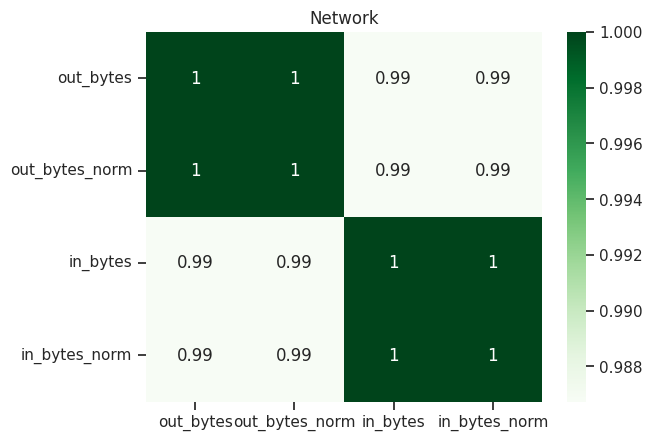

In [122]:
sb.heatmap(network_df[network_df.columns[0:-1]].corr(), cmap="Greens", annot=True).set(title='Network')

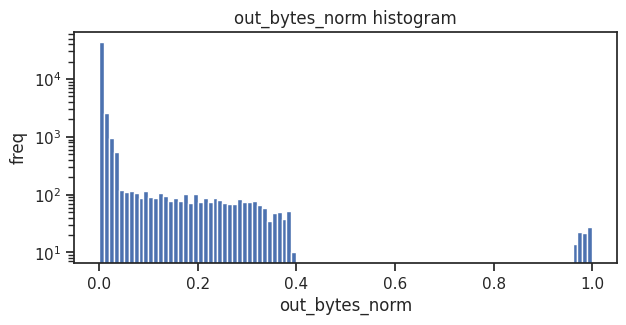

In [170]:
fig = plot_histogram(network_df.out_bytes_norm, bns=100, logscale=True)

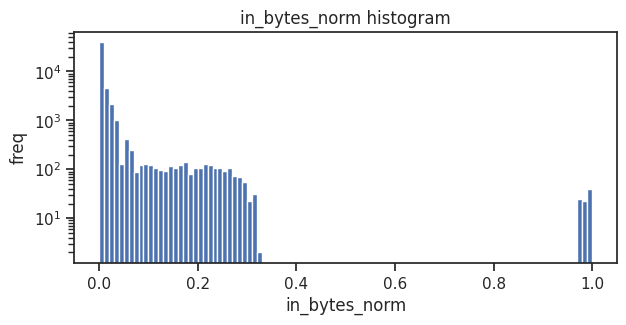

In [171]:
fig = plot_histogram(network_df.in_bytes_norm, bns=100, logscale=True)

## Memory

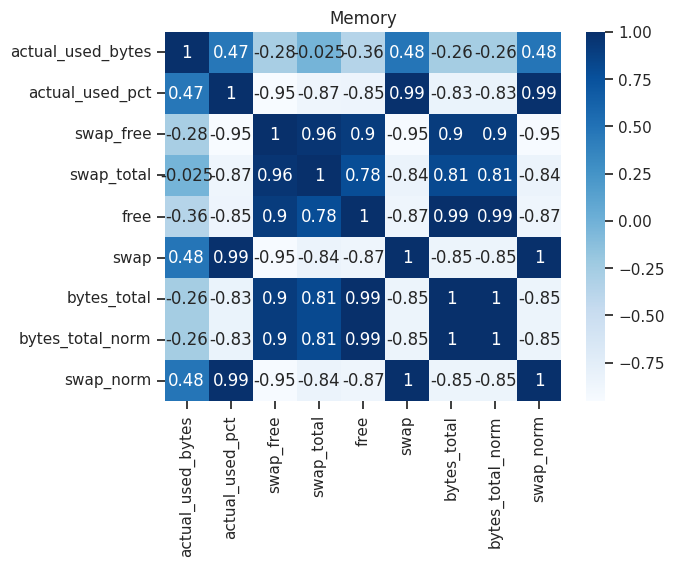

In [147]:
hm = sb.heatmap(memory_df.loc[:, memory_df.columns != 'host'].corr(), cmap="Blues", annot=True).set(title='Memory')

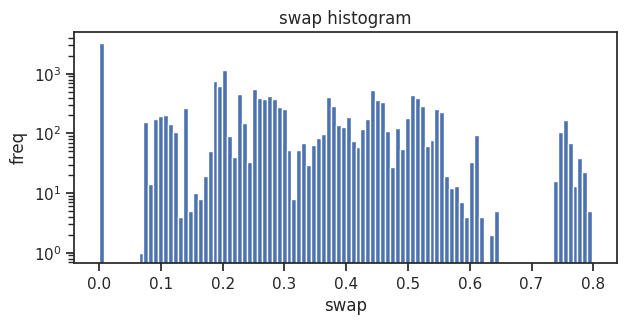

In [175]:
fig = plot_histogram(memory_df.swap, bns=100, logscale=True)

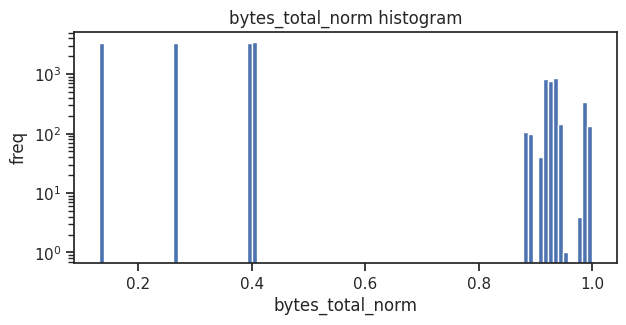

In [173]:
fig = plot_histogram(memory_df.bytes_total_norm, bns=100, logscale=True)

## CPU

[Text(0.5, 1.0, 'CPU')]

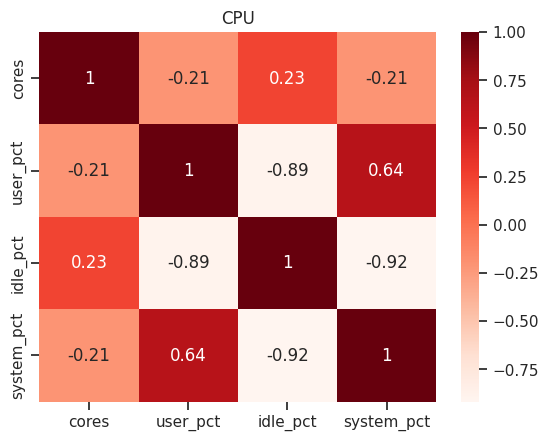

In [125]:
sb.heatmap(cpu_df[cpu_df.columns[0:-1]].corr(), cmap="Reds", annot=True).set(title='CPU')

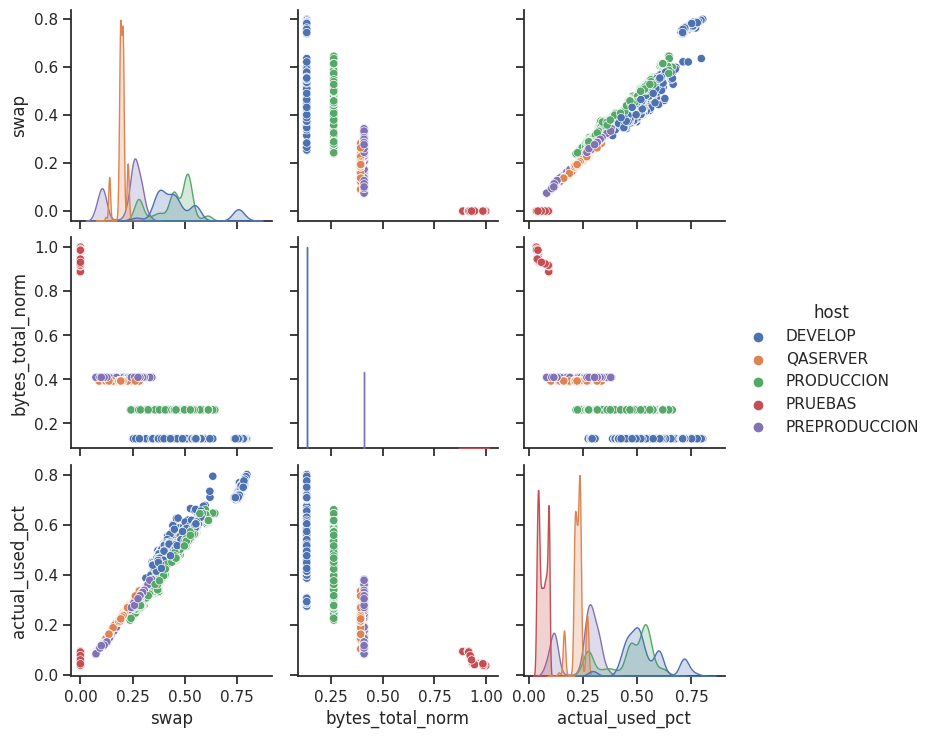

In [161]:
sb.pairplot(memory_df.loc[:,["swap","bytes_total_norm","actual_used_pct", "host"]], hue="host")

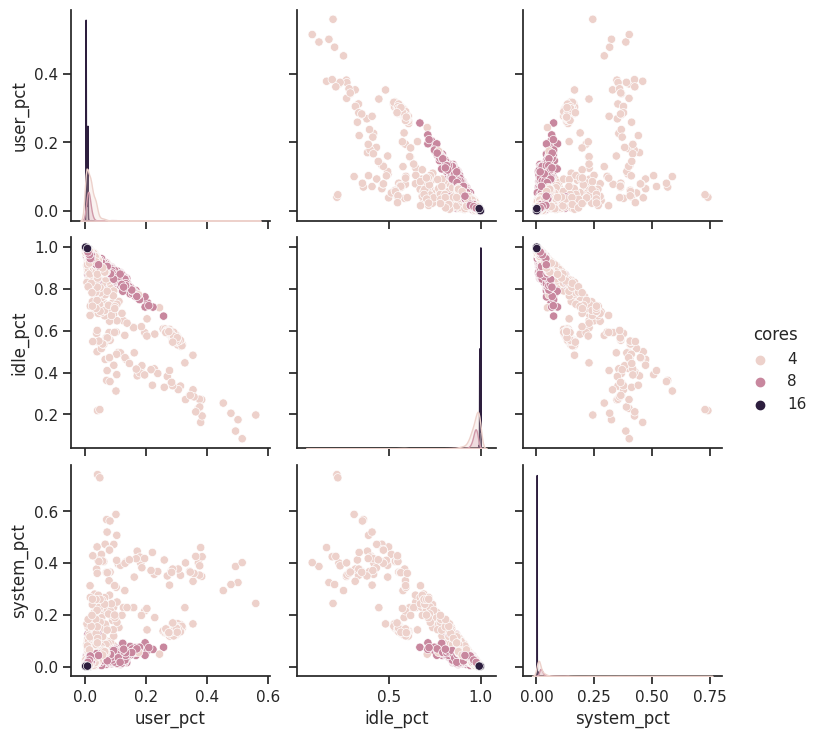

In [149]:
sb.pairplot(cpu_df.loc[:,cpu_df.columns != 'host'], hue="cores")

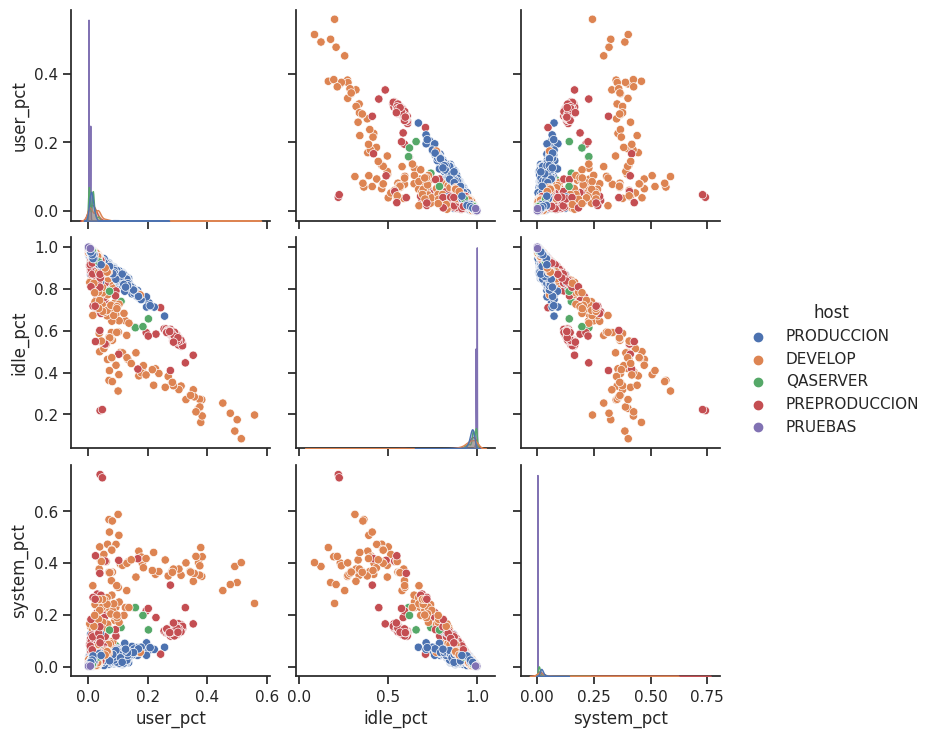

In [150]:
sb.pairplot(cpu_df.loc[:,cpu_df.columns != 'cores'], hue="host")

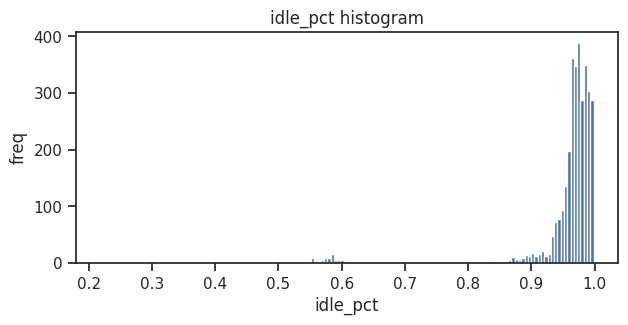

In [201]:
fig = plot_histogram(cpu_df.loc[cpu_df["host"] == 'PREPRODUCCION'].idle_pct,bns=150,logscale=False)

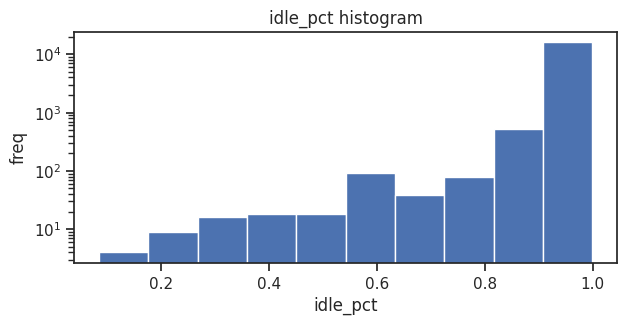

In [193]:
fig = plot_histogram(cpu_df.idle_pct, bns=10, logscale=True)

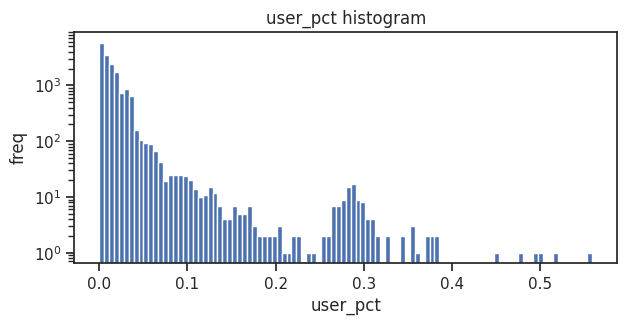

In [177]:
fig = plot_histogram(cpu_df.user_pct, bns=100, logscale=True)

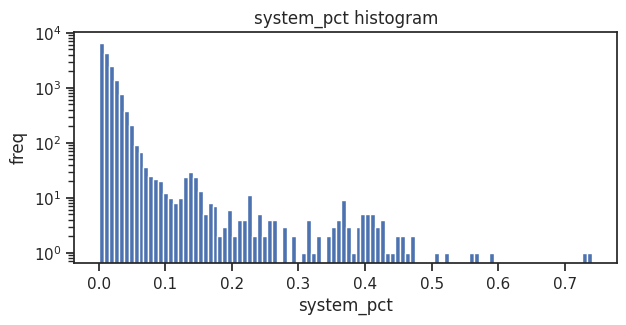

In [178]:
fig = plot_histogram(cpu_df.system_pct, bns=100, logscale=True)